{'whiskers': [<matplotlib.lines.Line2D at 0x1513f0bf808>,
 'caps': [<matplotlib.lines.Line2D at 0x1513f0bf048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1513f334788>,
 'medians': [<matplotlib.lines.Line2D at 0x1513b9460c8>,
 'fliers': [],
 'means': []}

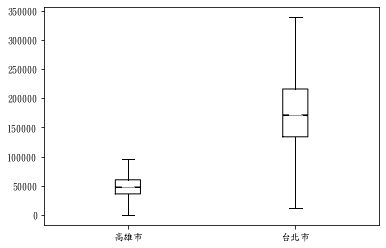

In [4]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
def estimate_price(data):
        if data['單價(元/平方公尺)'] == 0:
            data['單價(元/平方公尺)'] = data['總價(元)']/data['建物移轉總面積(平方公尺)']
        return data
county_dict=['高雄市', '台北市']
sample_dict={}
for county_key in county_dict:
    df = pd.read_excel('無價格影響之資料_{}_正常建物.xlsx'.format(county_key))
    df = df[~((df['總價(元)'].isin([0]))&(df['單價(元/平方公尺)'].isin([0])))]
    df = df.apply(estimate_price,axis=1)
    df = df['單價(元/平方公尺)']
    if len(df.index)>=10:
        sample_dict[county_key]=df
data_series=[]
for county_key in sample_dict:
    data_series.append(sample_dict[county_key])
mpl.rcParams['font.sans-serif'] = ['DFKai-SB']
mpl.rcParams['font.serif'] = ['DFKai-SB']
name = list(sample_dict.keys())
plt.boxplot(data_series,1,'',labels=name)